In [107]:
import numpy as np
import scipy
import utils
from utils import HouseHolder, QR, SVD,pic_deblur
import scipy.io
import scipy.linalg
from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot as plt
import time
from sklearn import preprocessing

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
#read the pricture
def open_picture(size:str,name:str):
    path = './test_images/'+size+'_'+size+'_'+name    
    im = Image.open(path+'.jpg')
    img = np.array(im)
    img = img.astype(np.float64) / 255
    return img

In [108]:
def working_procee(size,name,blur_type_l,blur_type_r,power_l,power_r,trunc):
    img_data = open_picture(size,name)
    #plt.imshow(img_data)
    blur_kernel_l,blur_kernel_r,blur_data = pic_deblur.blur_picture(img_data,blur_type_l,blur_type_r,power_l=power_l,power_r=power_r)
    begin = time.time()
    deblur_data,psnr = pic_deblur.deblur_picture(blur_kernel_l,blur_kernel_r,blur_data,trunc)
    time_used = time.time()-begin
    data = [img_data,blur_data,deblur_data]
    kernel = [blur_kernel_l,blur_kernel_r]
    return time_used,psnr,data,kernel

In [109]:
time_used, psnr,data,kernel = working_procee('1024','coffee','gaussian','gaussian',1,1,400)

In [103]:
psnr

4.496584411621907

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


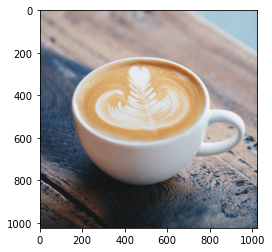

In [104]:
plt.imshow(data[2])